<a href="https://colab.research.google.com/github/Vishu52/9d9b93d3-2a90-4e7f-96c1-7607df7a178f/blob/main/EDA_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

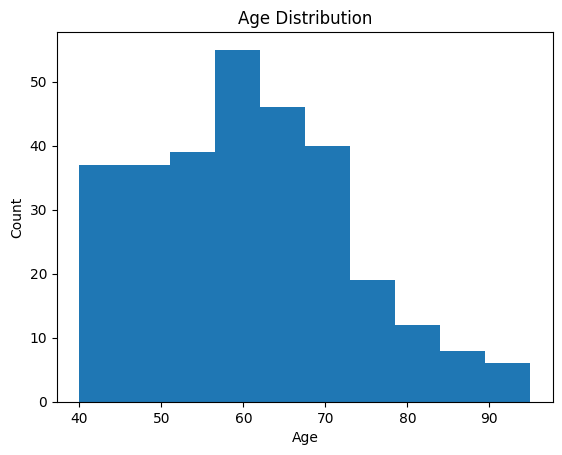

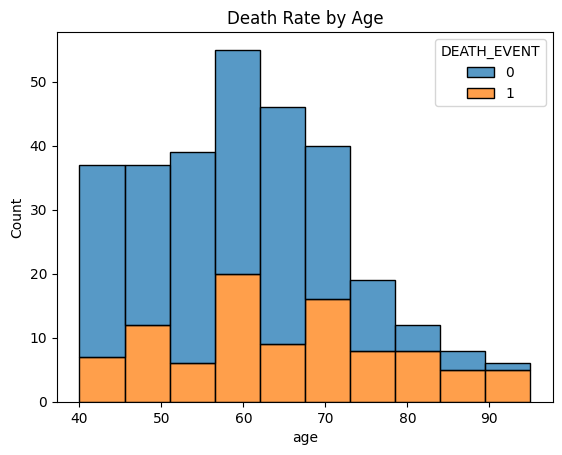

Gender Percentage:
 sex
1    64.882943
0    35.117057
Name: proportion, dtype: float64


/tmp/ipython-input-2186154790.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["age_group"]==g]["platelets"] for g in df["age_group"].unique()],


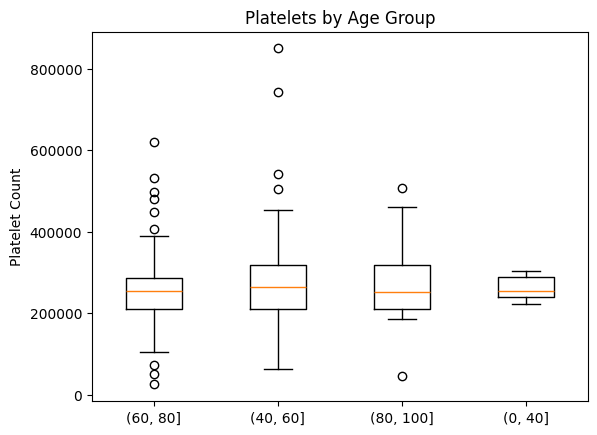

Correlation between Creatinine & Sodium: -0.1890952100911741


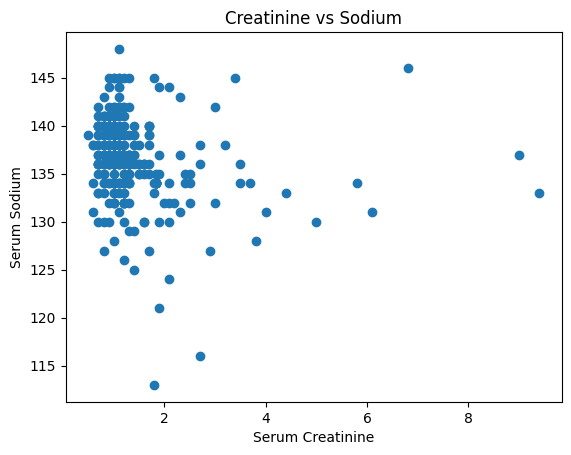

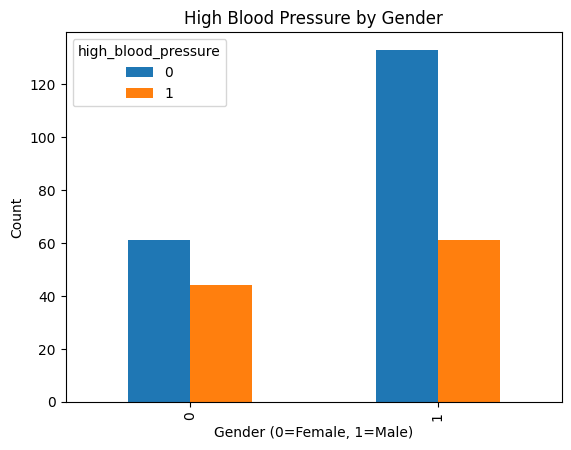

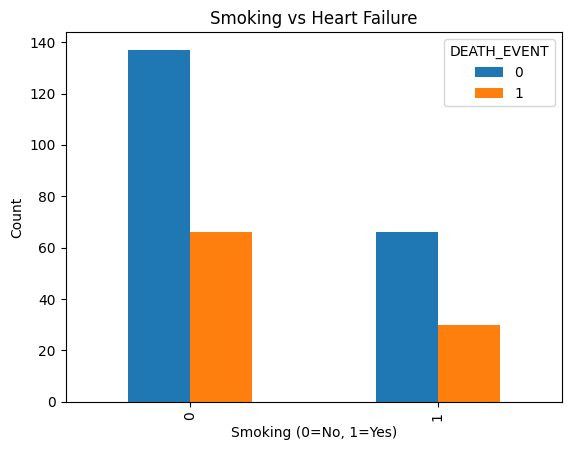

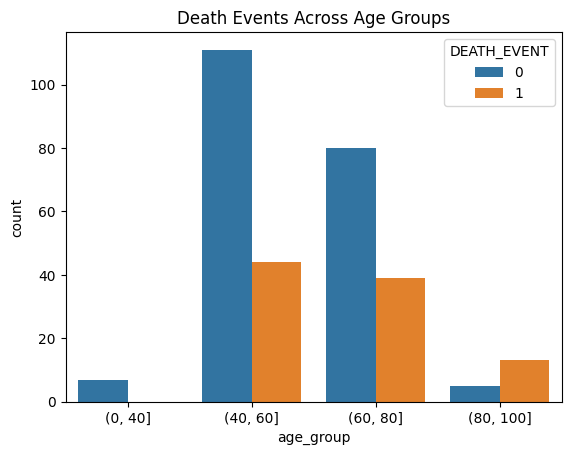

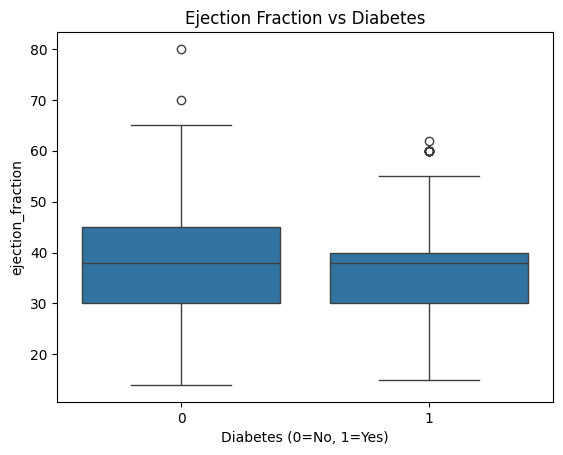

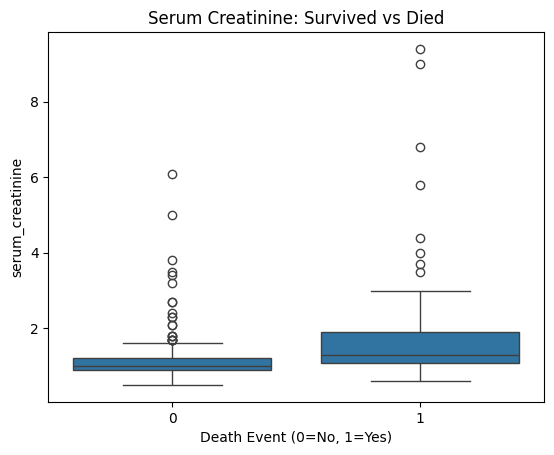

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

# 1. Distribution of age
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

# 2. Death rate vs age
sns.histplot(data=df, x="age", hue="DEATH_EVENT", multiple="stack")
plt.title("Death Rate by Age")
plt.show()

# 3. Percentage of male vs female
gender_percent = df["sex"].value_counts(normalize=True) * 100
print("Gender Percentage:\n", gender_percent)

# 4. Platelet count variation by age groups
df["age_group"] = pd.cut(df["age"], bins=[0,40,60,80,100])
plt.boxplot([df[df["age_group"]==g]["platelets"] for g in df["age_group"].unique()],
            labels=[str(g) for g in df["age_group"].unique()])
plt.title("Platelets by Age Group")
plt.ylabel("Platelet Count")
plt.show()

# 5. Correlation between creatinine & sodium
corr = df["serum_creatinine"].corr(df["serum_sodium"])
print("Correlation between Creatinine & Sodium:", corr)

plt.scatter(df["serum_creatinine"], df["serum_sodium"])
plt.xlabel("Serum Creatinine")
plt.ylabel("Serum Sodium")
plt.title("Creatinine vs Sodium")
plt.show()

# 6. High BP prevalence among males & females
hb = pd.crosstab(df["sex"], df["high_blood_pressure"])
hb.plot(kind="bar")
plt.title("High Blood Pressure by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.show()

# 7. Smoking habits vs heart failure
smoke_death = pd.crosstab(df["smoking"], df["DEATH_EVENT"])
smoke_death.plot(kind="bar")
plt.title("Smoking vs Heart Failure")
plt.xlabel("Smoking (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

# 8. Death events distribution across age groups
sns.countplot(data=df, x="age_group", hue="DEATH_EVENT")
plt.title("Death Events Across Age Groups")
plt.show()

# 9. Difference in ejection fraction (diabetes vs non-diabetes)
sns.boxplot(data=df, x="diabetes", y="ejection_fraction")
plt.title("Ejection Fraction vs Diabetes")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.show()

# 10. Serum creatinine levels: survived vs died
sns.boxplot(data=df, x="DEATH_EVENT", y="serum_creatinine")
plt.title("Serum Creatinine: Survived vs Died")
plt.xlabel("Death Event (0=No, 1=Yes)")
plt.show()
